# Assessment

Click to open in:  \[[GitHub](https://github.com/DIDSR/wsi_processing_toolbox/05_performance_assessment.ipynb)\]

Developer: Seyed.kahaki@fda.hhs.gov

## About this notebook
This jupyter notebook can be run on any computer with a standard browser and no prior installation of any programming language is required.

### About

Stain normalization is a common preprocessing step that aims to reduce color differences to a minimum that are not important in clinical practice.
In digital pathology, in order to have better results with different scanners and different types of colors, normalization is used to reduce errors.

### Setting up :
You should install our package and import to your code , then use it .


1. At the first you should import some packages that you need .

In [1]:
import numpy as np
import pandas as pd
from assessment.uncertainty import Uncertainty_Analysis
UncertaintyAnalysis = Uncertainty_Analysis()

please enter xls file path, for example C:/Results/ResultsExample.xlsx: ResultsExample.xlsx
Do you want to plot ROC curve (1 = Yes ,  0 = No)1
plot_roc sets incorrectly!
Do you want to get AUC based on Delong method? (1 = Yes ,  0 = No)1
plot_roc sets incorrectly!
Do you want to plot ROC curve (1 = Yes ,  0 = No)0
perform_Bootstrap sets incorrectly!
Please enter a name for this results: Covid19
####################
Results for Covid19
          pred:yes  pred:no
true:yes       285       14
true:no         79       32
Precision:  0.782967032967033
Precision_CI:  (0.7406191220140836, 0.8253149439199823)
Recall:  0.9531772575250836
Recall_CI:  (0.9292315454409011, 0.9771229696092661)
Delong Method
AUC: 0.8234354756093887
AUC COV: 0.0005619434162873769
95% AUC CI: [0.77697385 0.8698971 ]


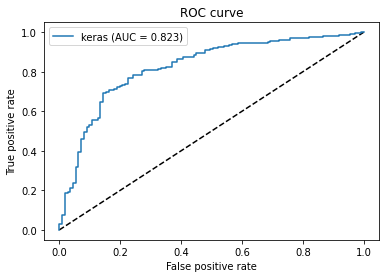

In [16]:
xls_file =input("please enter xls file path, for example C:/Results/ResultsExample.xlsx: ")

perform_Bootstrap = int(input(r"Do you want to plot ROC curve (1 = Yes ,  0 = No)"))
if perform_Bootstrap==1 :
    UncertaintyAnalysis.perform_Bootstrap= True
if plot_roc==0 :
    UncertaintyAnalysis.perform_Bootstrap= False
else:
    print('perform_Bootstrap sets incorrectly!')

plot_roc = int(input(r"Do you want to plot ROC curve (1 = Yes ,  0 = No)"))
if plot_roc==1 :
    UncertaintyAnalysis.plot_roc= True
if plot_roc==0 :
    UncertaintyAnalysis.plot_roc= False
else:
    print('plot_roc sets incorrectly!')
    
    
perform_Delong = int(input(r"Do you want to get AUC based on Delong method? (1 = Yes ,  0 = No)"))
if perform_Delong==1 :
    UncertaintyAnalysis.perform_Delong= True
if perform_Delong==0 :
    UncertaintyAnalysis.perform_Delong= False
else:
    print('plot_roc sets incorrectly!') 

UncertaintyAnalysis.tag = str(input(r"Please enter a name for this results: "))
#loading file tnto dataframe
df = pd.read_excel(xls_file)
# print("\n ",df)

#define two list to save values
y_pred=[]
y_truth= []

#extraction columns values 
for i in df.values:
    y_truth.append(i[0])
    y_pred.append(i[1])


#convert list to ndarray
y_pred = np.array(y_pred)
y_truth = np.array(y_truth)

Results = UncertaintyAnalysis.get_report(y_pred , y_truth)

### Setting parameters manually

In [17]:
UncertaintyAnalysis.perform_Delong = False
UncertaintyAnalysis.perform_Bootstrap = False
UncertaintyAnalysis.plot_roc = False
UncertaintyAnalysis.tag = 'My Results'

In [18]:
#For quick testing
y_pred = np.array([0.21, 0.32, 0.63, 0.35, 0.92, 0.79, 0.82, 0.99, 0.04])
y_truth= np.array([0,    1,    0,    0,    1,    1,    0,    1,   0  ])


Results = UncertaintyAnalysis.get_report(y_pred , y_truth)


####################
Results for My Results
          pred:yes  pred:no
true:yes         3        1
true:no          2        3
Precision:  0.6
Precision_CI:  (0.17059340550788216, 1.0294065944921178)
Recall:  0.75
Recall_CI:  (0.32565534972143556, 1.1743446502785644)


In [19]:
precision,Precision_CI,recall,Recall_CI, auc_delong ,auc_delong_cov ,ci_delong , fpr_keras, tpr_keras ,auc_keras ,cmtx = Results

In [20]:
precision

0.6

In [21]:
Precision_CI

(0.17059340550788216, 1.0294065944921178)